<p align=center style ="font-size:26px;"> 
<b> LAB 10: PROCESAMIENTO DE SEÑALES ECG </b>
 </p>

#### **Tabla de Contenido**  

1. [Introducción](#introduccion)  
2. [Objetivos](#objetivos)  
3. [Materiales](#materiales)  
4. [Procedimiento](#procedimiento)  
5. [Resultados](#resultados)  
6. [Discusión](#discusion)  
7. [Conclusiones](#conclusiones)  
8. [Bibliografía](#bibliografia)  
    






 

 

   

 


 


## Introducción  

## **Objetivos**  

<p align="Jutify">

- Entender como funcionan las librerias `NeuroKit2` y `ecg_plot` (principalmente algunas funciones)
- Emplear las funciones `ecg_clean`,`ecg_process`,`ecg_analyze`,`ecg_plot` de la libreria NeuroKit2  
- Emplear la funcion `ecg_plot_1` de la libreria ecg_plot
- Analizar los parametros de salida que nos brinda ciertas funciones (`nk.ecg_clean`,`nk.ecg_plot`,`ecg.plot.plot_1`, etc)
- Comparar los parámetros de salida de las funciones para cada derivada (DI, DII, DIII) en las actividades de basal, aguantar la respiración 10 segundos y post-ejercicio.
<p>

<table align="center">
    <tr>
        <td align="center"><b>Materiales</b></td>
    </tr>
    <tr>
        <td><b>Señales ECG adquiridas del lab 5</b></td>
    </tr>
    <tr>
        <td><b>Python notebook</b></td>
    </tr>
    <tr>
        <td><b>Librería NeuroKit2</b></td>
    </tr>
    <tr>
        <td><b>Librería ecg_plot</b></td>
    </tr>
    <tr>
        <td><b>Librerías comúnmente utilizadas (matplotlib.pyplot, pandas, numpy, etc.)</b></td>
    </tr>
</table>




## **Procedimiento** 

<p align="justify">

- **Adquisición de las señales de ECG**  
  Se adquieren las señales de ECG utilizando el **BITalino** y el **OpenSignals**. Estas señales se obtuvieron en el laboratorio 5 de este repositorio. Las bioseñales fueron capturadas en tres condiciones: actividad basal, apnea de 10 segundos y post-ejercicio, registrándose en sus respectivas derivadas estándar (DI, DII, DIII).

- **Librerías a utilizar**  
  Para el análisis de la señal de ECG, se utilizaron las librerías **NeuroKit2** y **ecg_plot**.

- **Escalamiento de la señal recién obtenida del BITalino**  
  Los valores de la señal obtenidos del BITalino están en formato digital, con un rango de 0 a 1023. Para convertirlos a milivoltios (mV), que es el formato ideal para el análisis de ECG, se realizó un escalado de la siguiente manera:

  $$
  \frac{\text{Señal a analizar} \times 1.2 \, \text{mV}}{\text{Máximo valor de la señal a analizar}}
  $$

- **Procesamiento de la señal:**
  - Se utiliza la función `ecg_clean` de la librería NeuroKit2 para limpiar la señal escalada, eliminando posibles artefactos.
  
  - Luego, se emplea la función `ecg_process` en la señal limpiada, obteniendo los parámetros `signals` (un DataFrame con la señal filtrada, frecuencia cardíaca, etc.) e `info` (un diccionario con información adicional sobre la señal procesada).

  - La señal es analizada con la función `ecg_analyze`, que proporciona varios parámetros como la variabilidad de la frecuencia cardíaca (HRV) y otros aspectos clínicamente relevantes.

  - Con la función `ecg_plot` de NeuroKit2 (`nk.ecg_plot`), se genera una gráfica de la señal analizada, mostrando parámetros importantes en la visualización.

  - Se realiza un nuevo escalamiento a la señal limpia, análogo al inicial, con el siguiente ajuste:

    $$
    \frac{\text{Señal limpiada} \times 1.5 \, \text{mV}}{\text{Máximo valor de la señal limpiada}}
    $$

    Así obtenemos la señal "limpiada-escalada".

  - Usando la librería **ecg_plot**, se genera un nuevo gráfico de la señal "limpiada-escalada" mediante la función `plot_1` (`ecg_plot.plot_1`). Esto se debe a que `ecg_plot` acepta este tipo de señales en formato de array, mientras que los parámetros obtenidos de `ecg_process` son DataFrames.

Se realizaron gráficos adicionales de la señal cruda y de la señal limpiada utilizando `matplotlib.pyplot`, facilitando así una visualización progresiva durante el procesamiento de la señal.

</p>


## Resultados 

-  ### Basal

#### DI


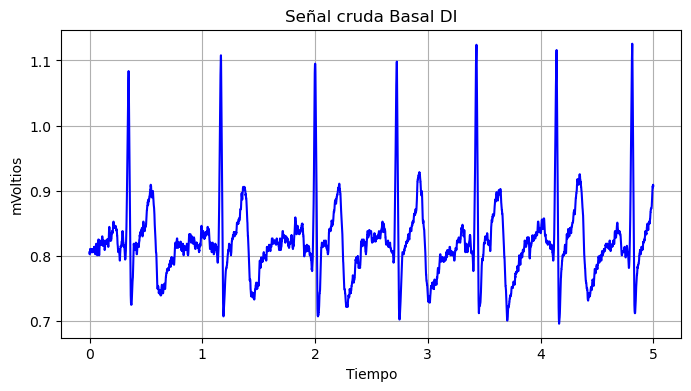

c:\Users\rogge\anaconda3\envs\mne\Lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:529: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(


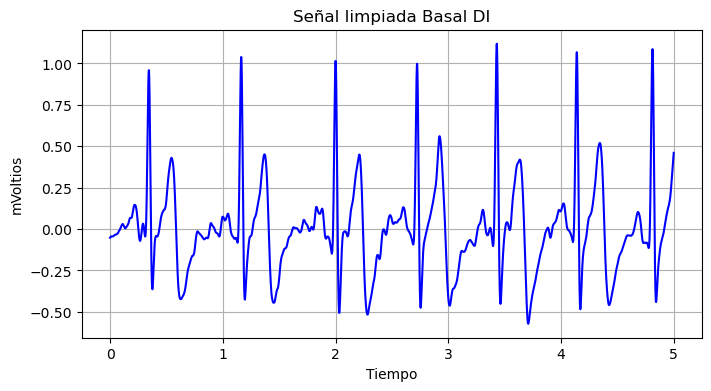

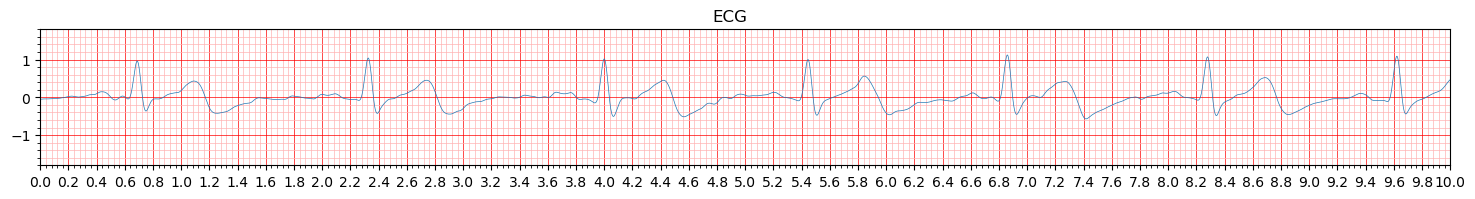

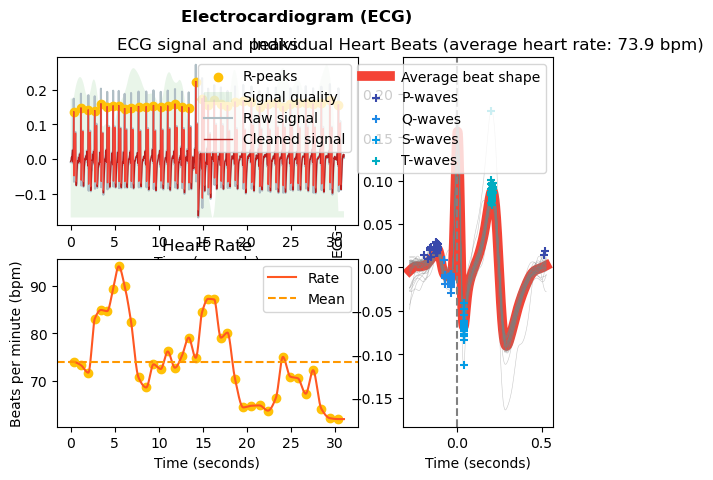

In [40]:
R1 = funcion_leer("basal/R1.txt")  # Carga la señal cruda desde un archivo
report, signals, info = procesar_ecg(R1,"Basal DI")

#### DII


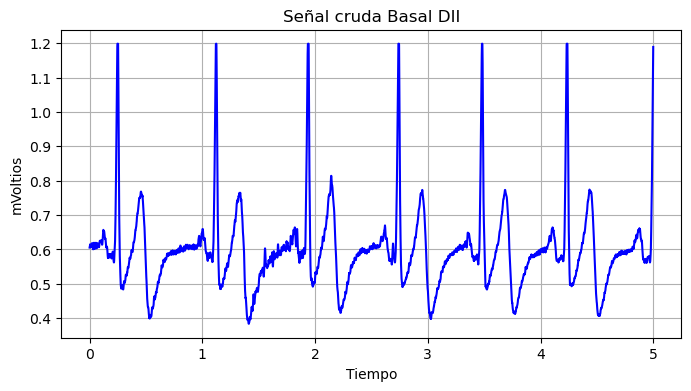

c:\Users\rogge\anaconda3\envs\mne\Lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:529: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(


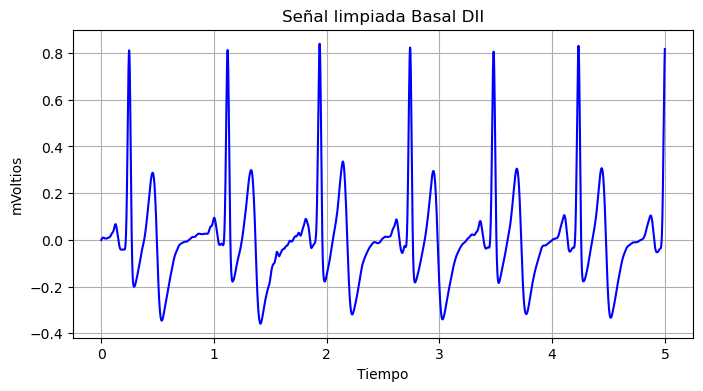

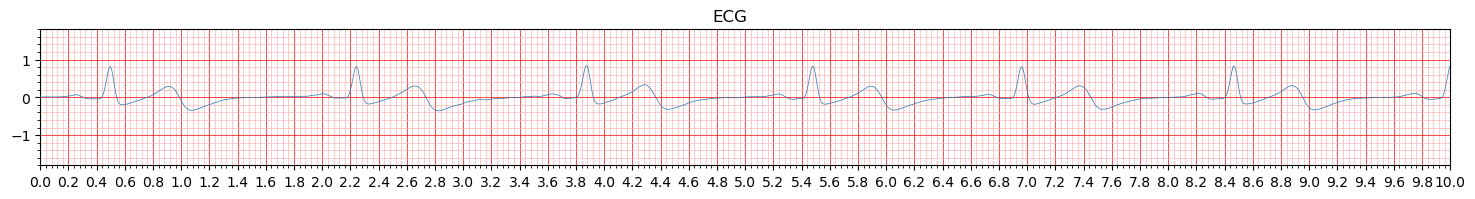

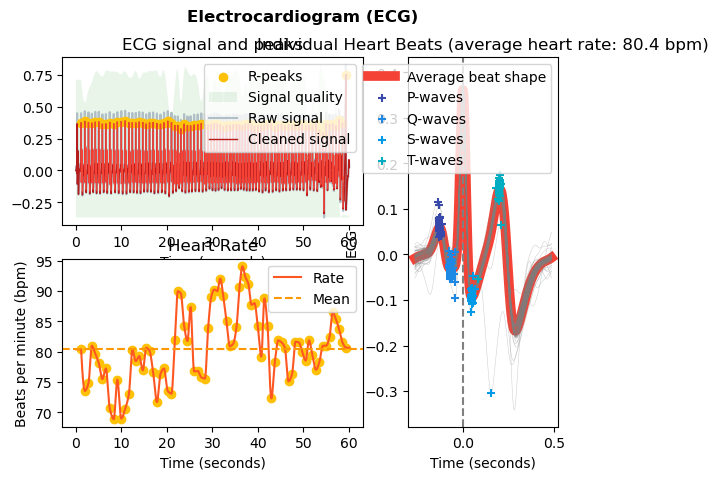

In [41]:
R2 = funcion_leer("basal/R2.txt")  # Carga la señal cruda desde un archivo
report, signals, info = procesar_ecg(R2,"Basal DII")

#### DIII


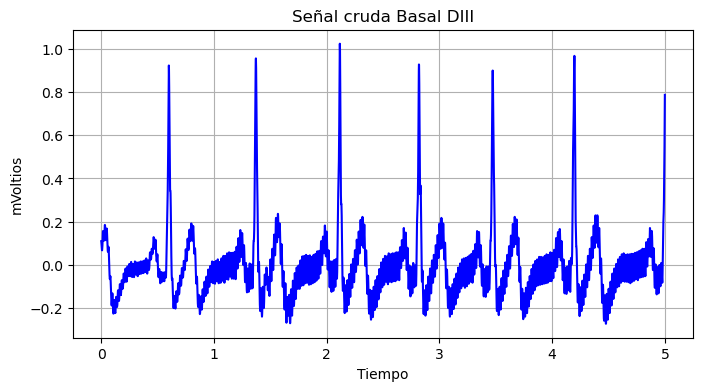

c:\Users\julio\Programas\envs\mne\Lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:529: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(


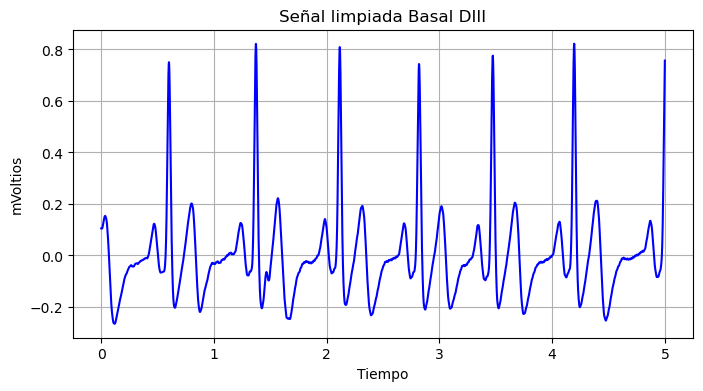

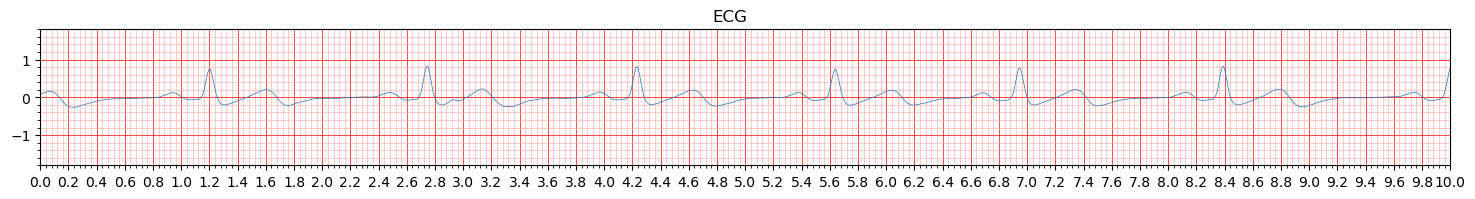

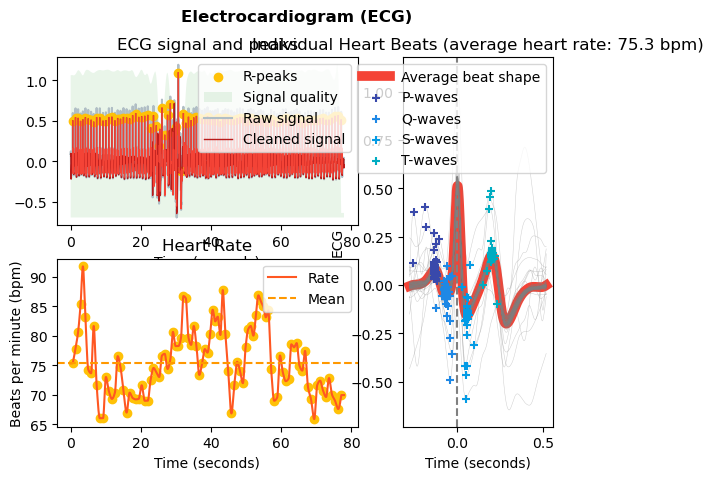

In [9]:
with open("basal/R3.txt","r") as basal_3:
    basal3 = obtener_dato_de_txt(basal_3)

#para convertir a mV
basal3_mv = convertir_a_mV(basal3)

report, signals, info = procesar_ecg(basal3_mv,"Basal DIII")


-  ### Aguntar la respiración 10 segundos

#### DI






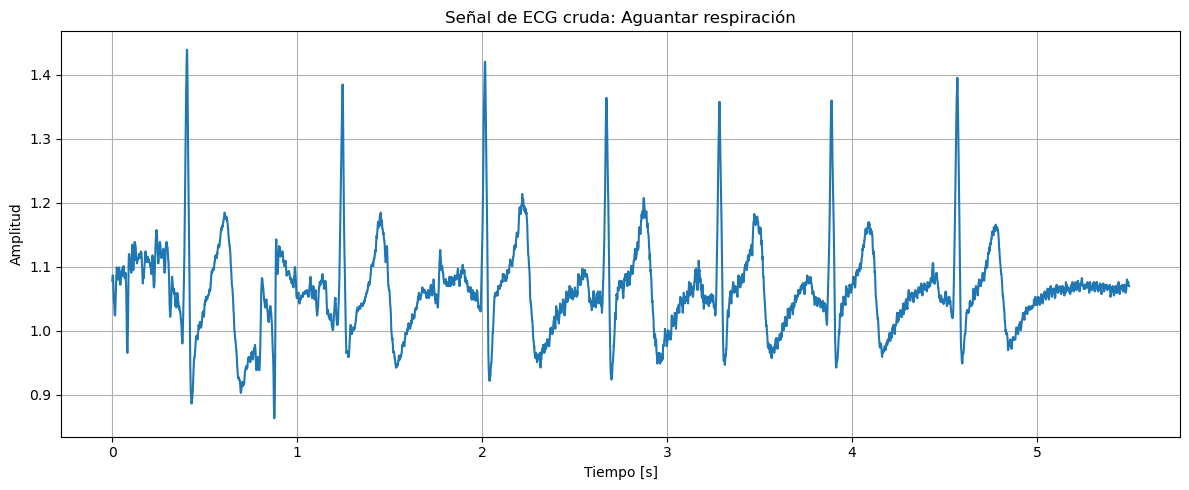

In [27]:
sample, amplitude = extraer_datos("mantener la respiración/derivada1.txt")
amplitude = amplitude*1.5/np.max(amplitude) #Primer escalamiento
grafica(sample[0:5500], amplitude[0:5500])

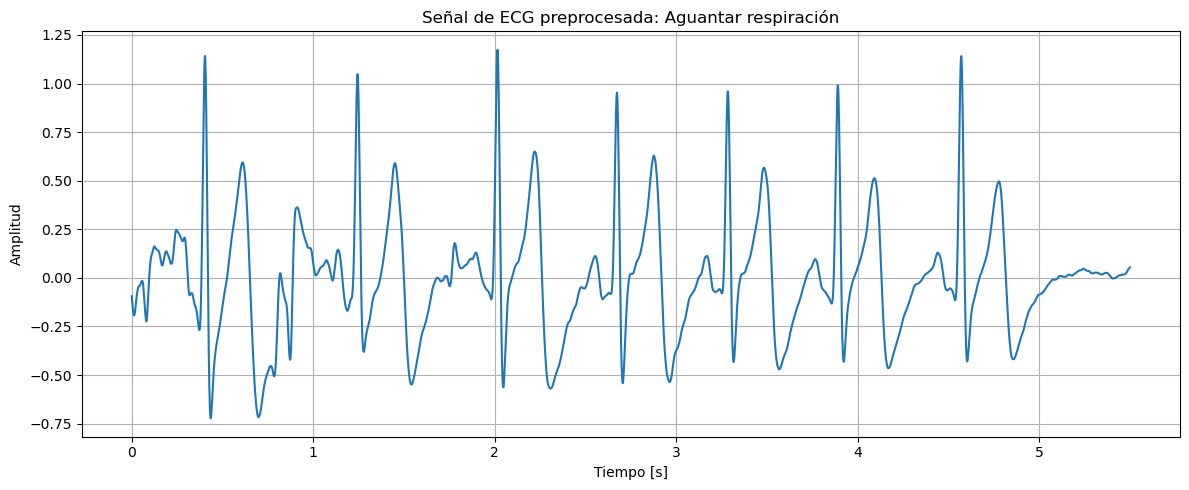

c:\Users\aleja\anaconda3\envs\mne\Lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:529: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(


Para la derivada 1 del estado basal, el ritmo cardiaco promedio es de: 74 bpm


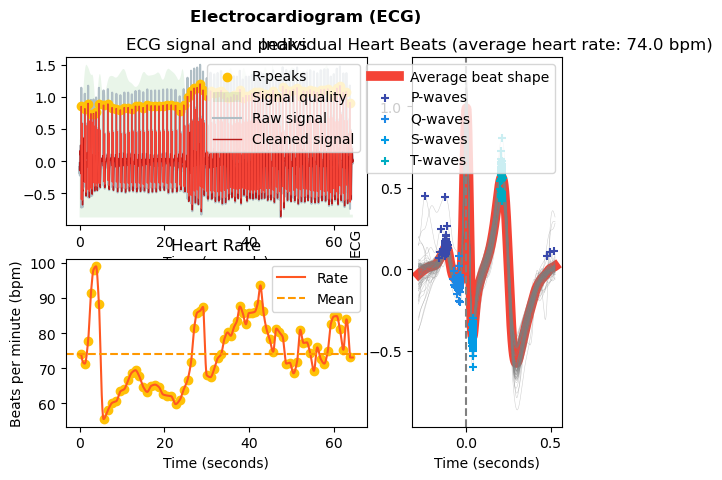

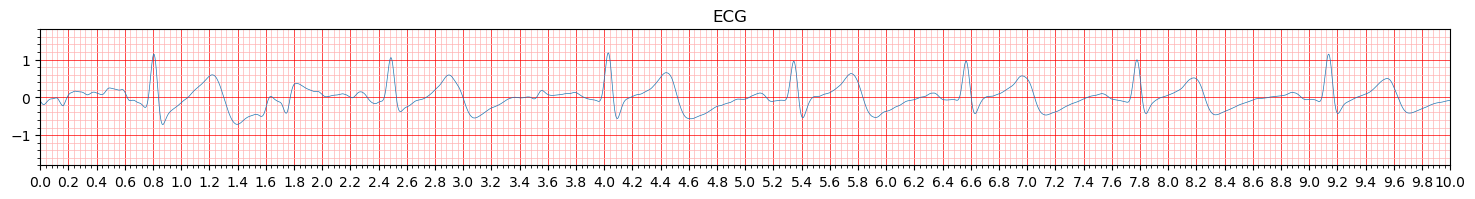

In [ ]:
i = ecg_procesamiento(sample, amplitude)



#### DII





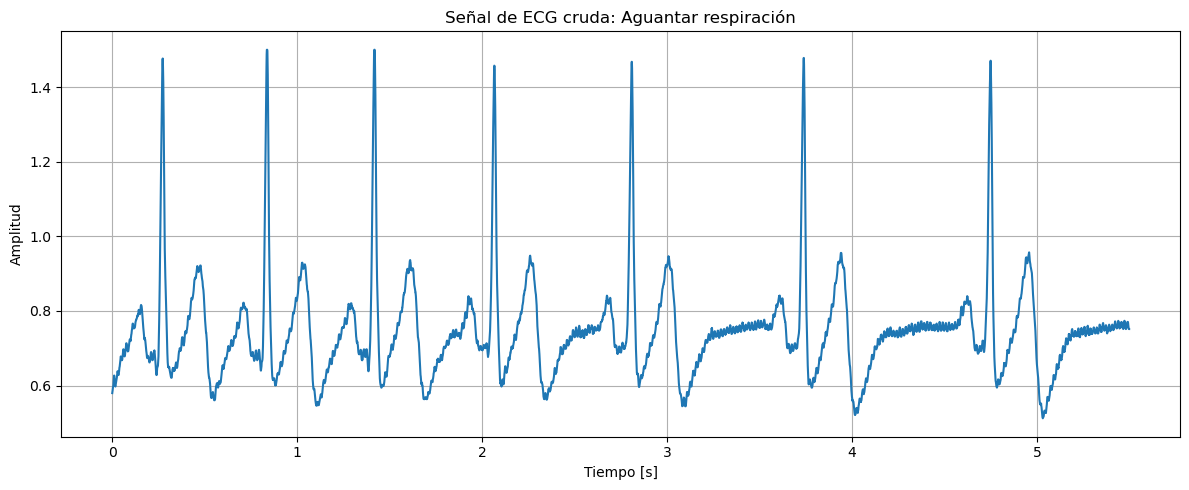

In [18]:
sample, amplitude = extraer_datos("mantener la respiración/derivada2.txt")
amplitude = amplitude*1.5/np.max(amplitude) #Primer escalamiento
grafica(sample[0:5500], amplitude[0:5500])

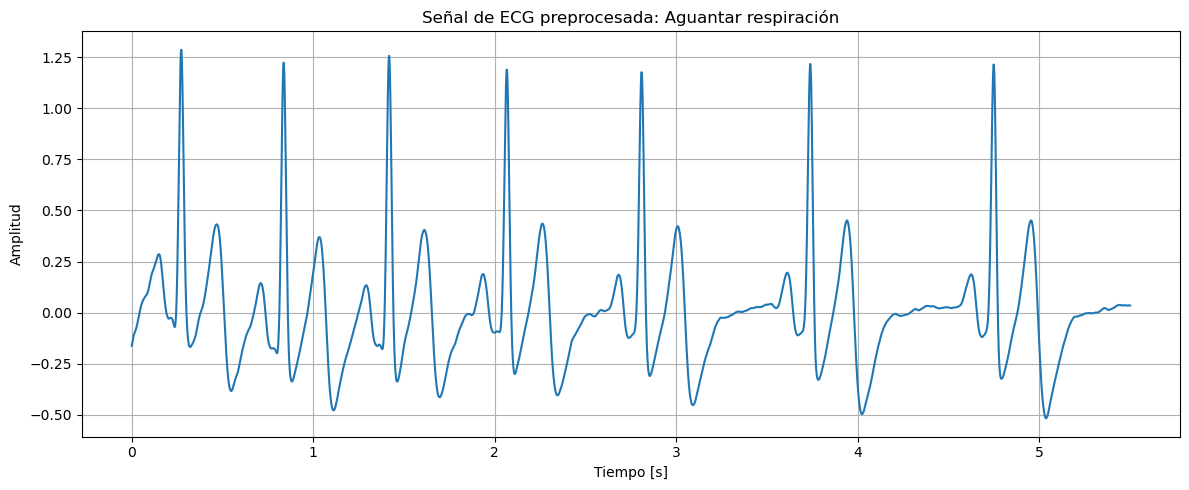

c:\Users\aleja\anaconda3\envs\mne\Lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:529: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(


Para la derivada 2 del estado basal, el ritmo cardiaco promedio es de: 73 bpm


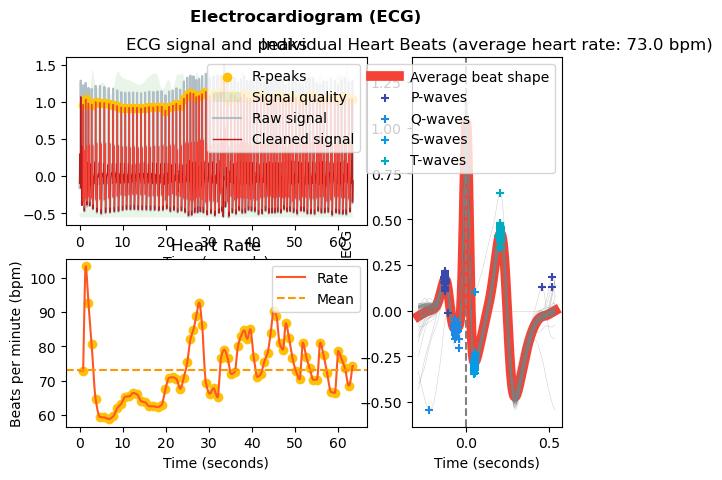

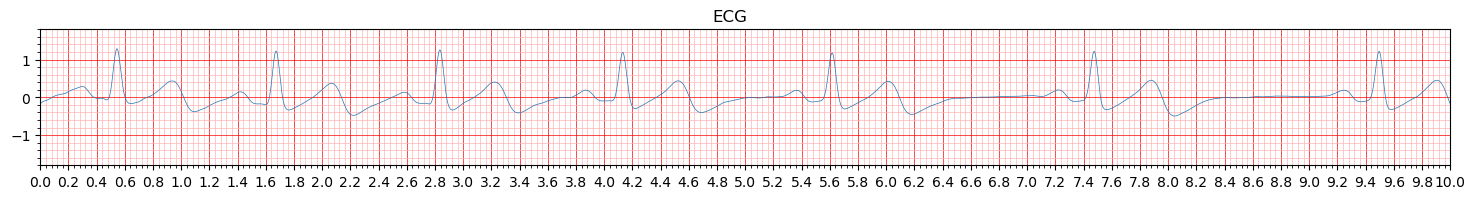

In [ ]:
i = ecg_procesamiento(sample, amplitude, i)

#### DIII  

-  ### Post ejercicio


#### DI





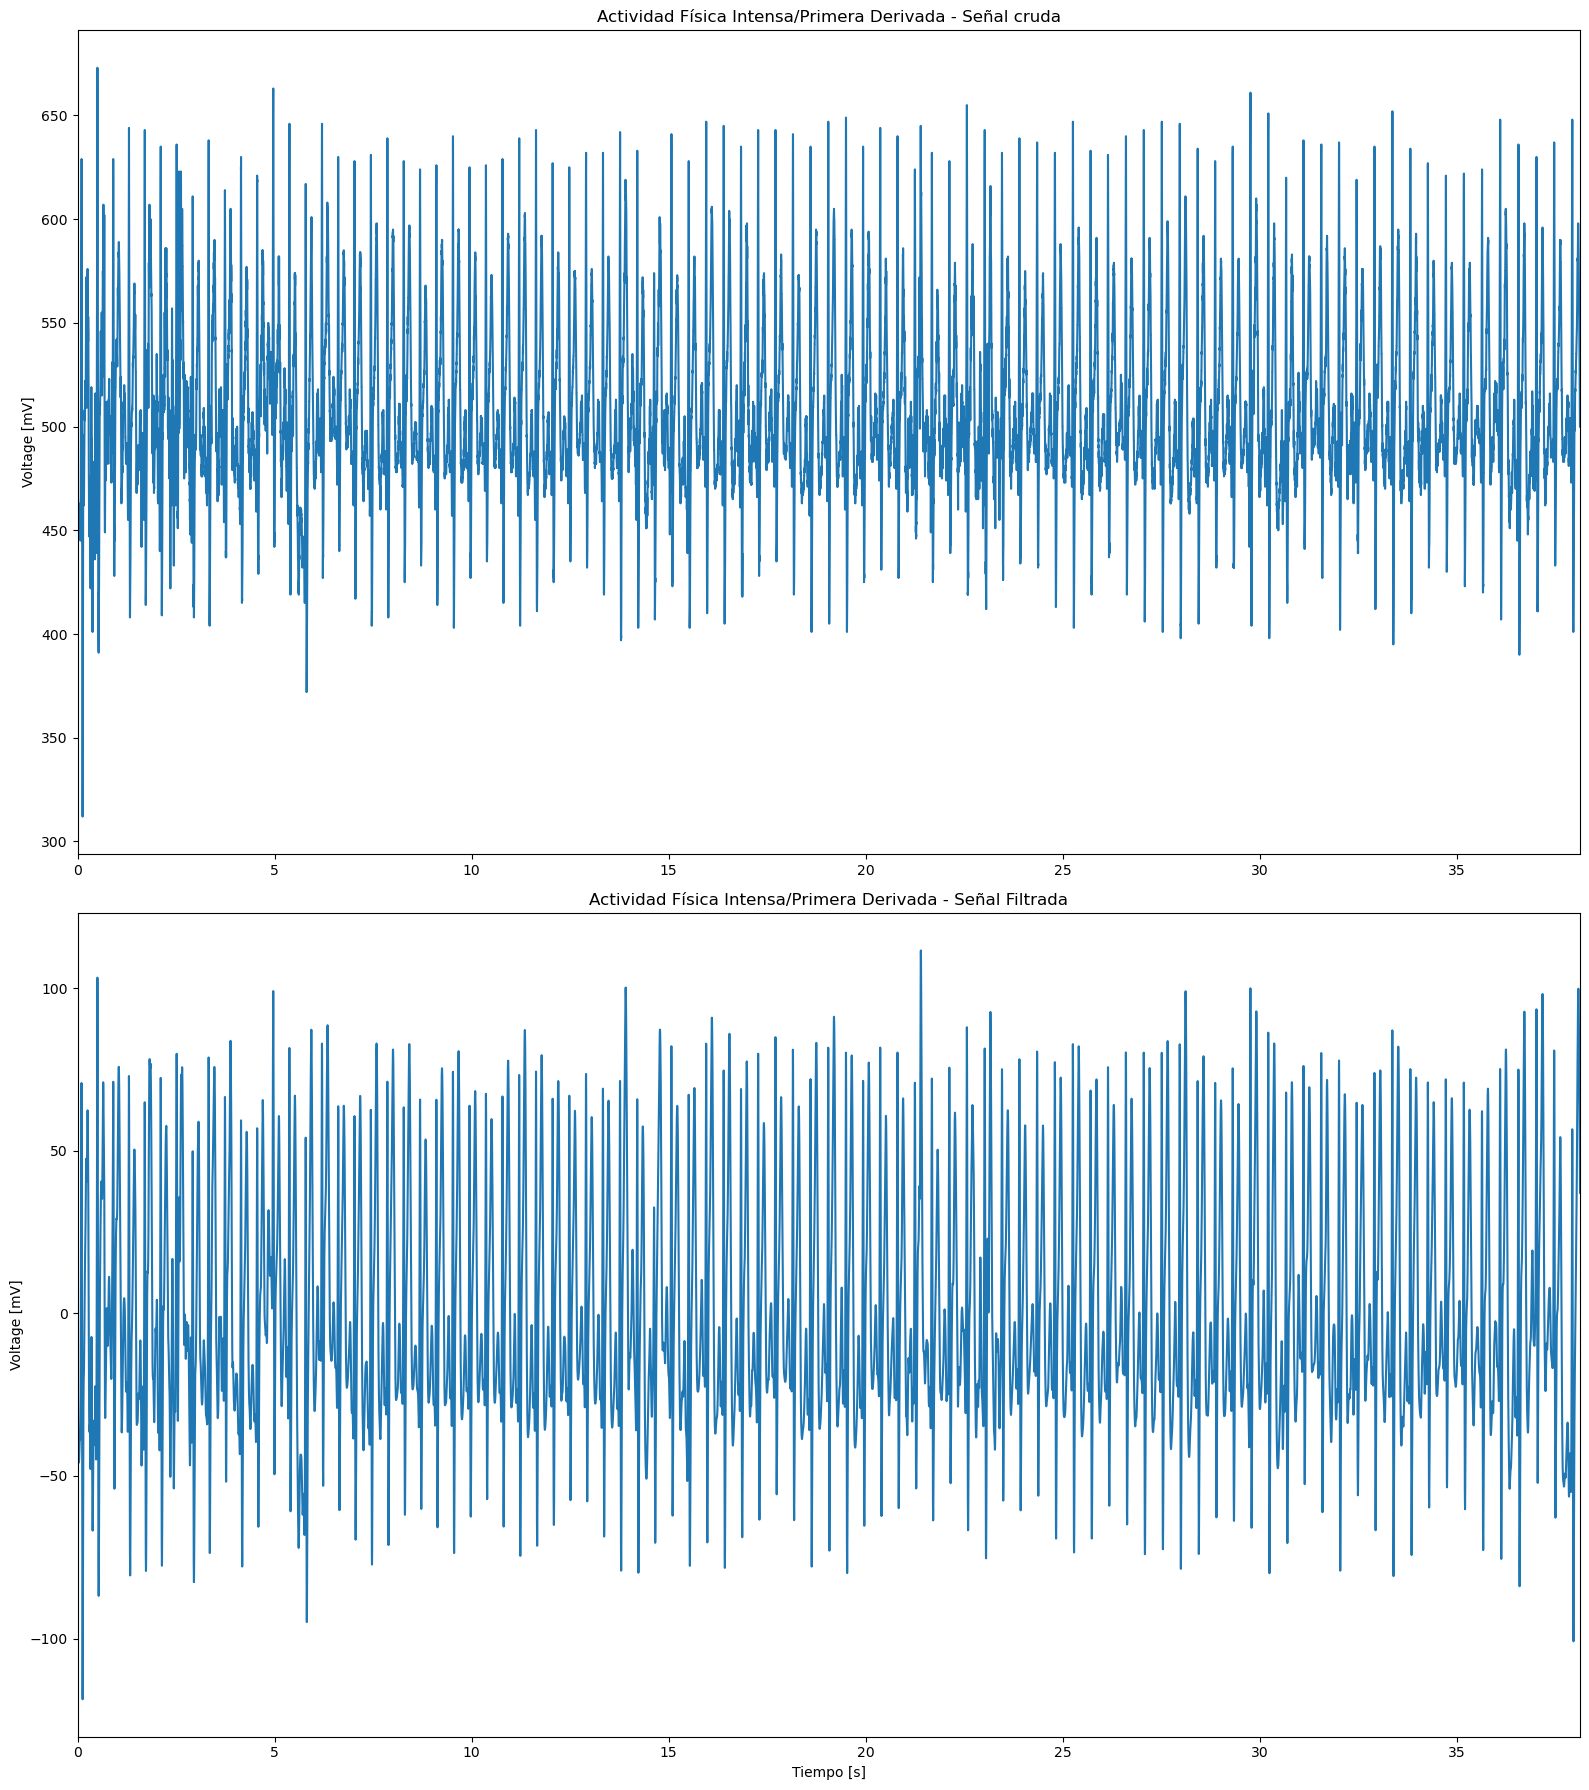

In [9]:
Fs=1000;
t1,ecgSignalD1=read("ejercicio/derivada1.txt",Fs)

clenSignalD1=nk.ecg_clean(ecgSignalD1,Fs)

plt.figure(figsize=(16,18))

plt.subplot(211)
plt.plot(t1,ecgSignalD1)
plt.ylabel('Voltage [mV]')
plt.title('Actividad Física Intensa/Primera Derivada - Señal cruda') 
plt.autoscale(True, axis='x', tight=True)

plt.subplot(212)
plt.plot(t1,clenSignalD1)
plt.xlabel('Tiempo [s]')
plt.ylabel('Voltage [mV]')
plt.title('Actividad Física Intensa/Primera Derivada - Señal Filtrada') 
plt.autoscale(True, axis='x', tight=True)

plt.tight_layout()
plt.show()

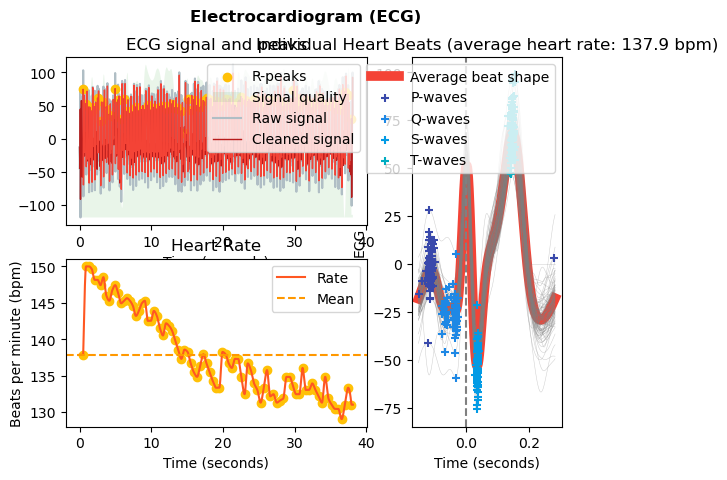

In [10]:
signalD1, infoD1 = nk.ecg_process(clenSignalD1, Fs)
nk.ecg_plot(signalD1,infoD1)

In [11]:
ecg_analisisD1 = nk.ecg_analyze(signalD1, Fs)
print(ecg_analisisD1)

  ECG_Rate_Mean             HRV_MeanNN                HRV_SDNN HRV_SDANN1  \
0    137.885816  [[435.2325581395349]]  [[18.051999673234608]]    [[nan]]   

  HRV_SDNNI1 HRV_SDANN2 HRV_SDNNI2 HRV_SDANN5 HRV_SDNNI5  \
0    [[nan]]    [[nan]]    [[nan]]    [[nan]]    [[nan]]   

               HRV_RMSSD  ...             HRV_SampEn             HRV_ShanEn  \
0  [[5.295947396220002]]  ...  [[1.127811443360372]]  [[5.264935650272711]]   

              HRV_FuzzyEn                HRV_MSEn               HRV_CMSEn  \
0  [[0.5737541641486706]]  [[0.6477128724530155]]  [[1.0768960433044041]]   

              HRV_RCMSEn                 HRV_CD                 HRV_HFD  \
0  [[1.077971366949744]]  [[1.672842420962544]]  [[1.6921755592894703]]   

                  HRV_KFD                 HRV_LZC  
0  [[1.6034980348065442]]  [[0.5230680614292406]]  

[1 rows x 83 columns]


c:\Users\51913\anaconda3\envs\Diegos_environment\Lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:529: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(


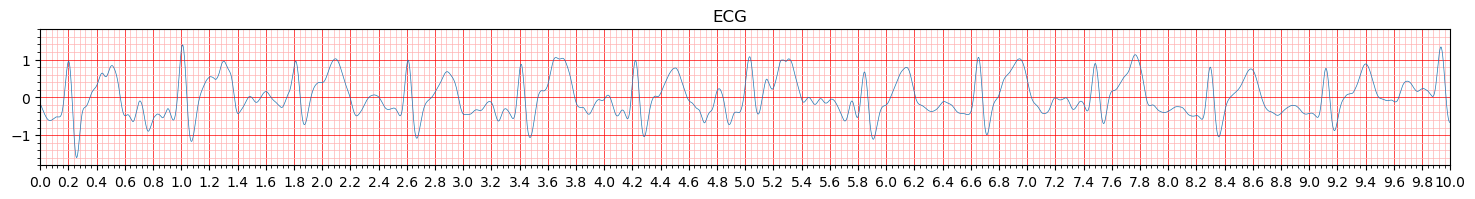

In [12]:
normalizeCleanSignal=np.array(clenSignalD1)/max(clenSignalD1)*1.5
ecg_plot.plot_1(normalizeCleanSignal[0:5000])



#### DII






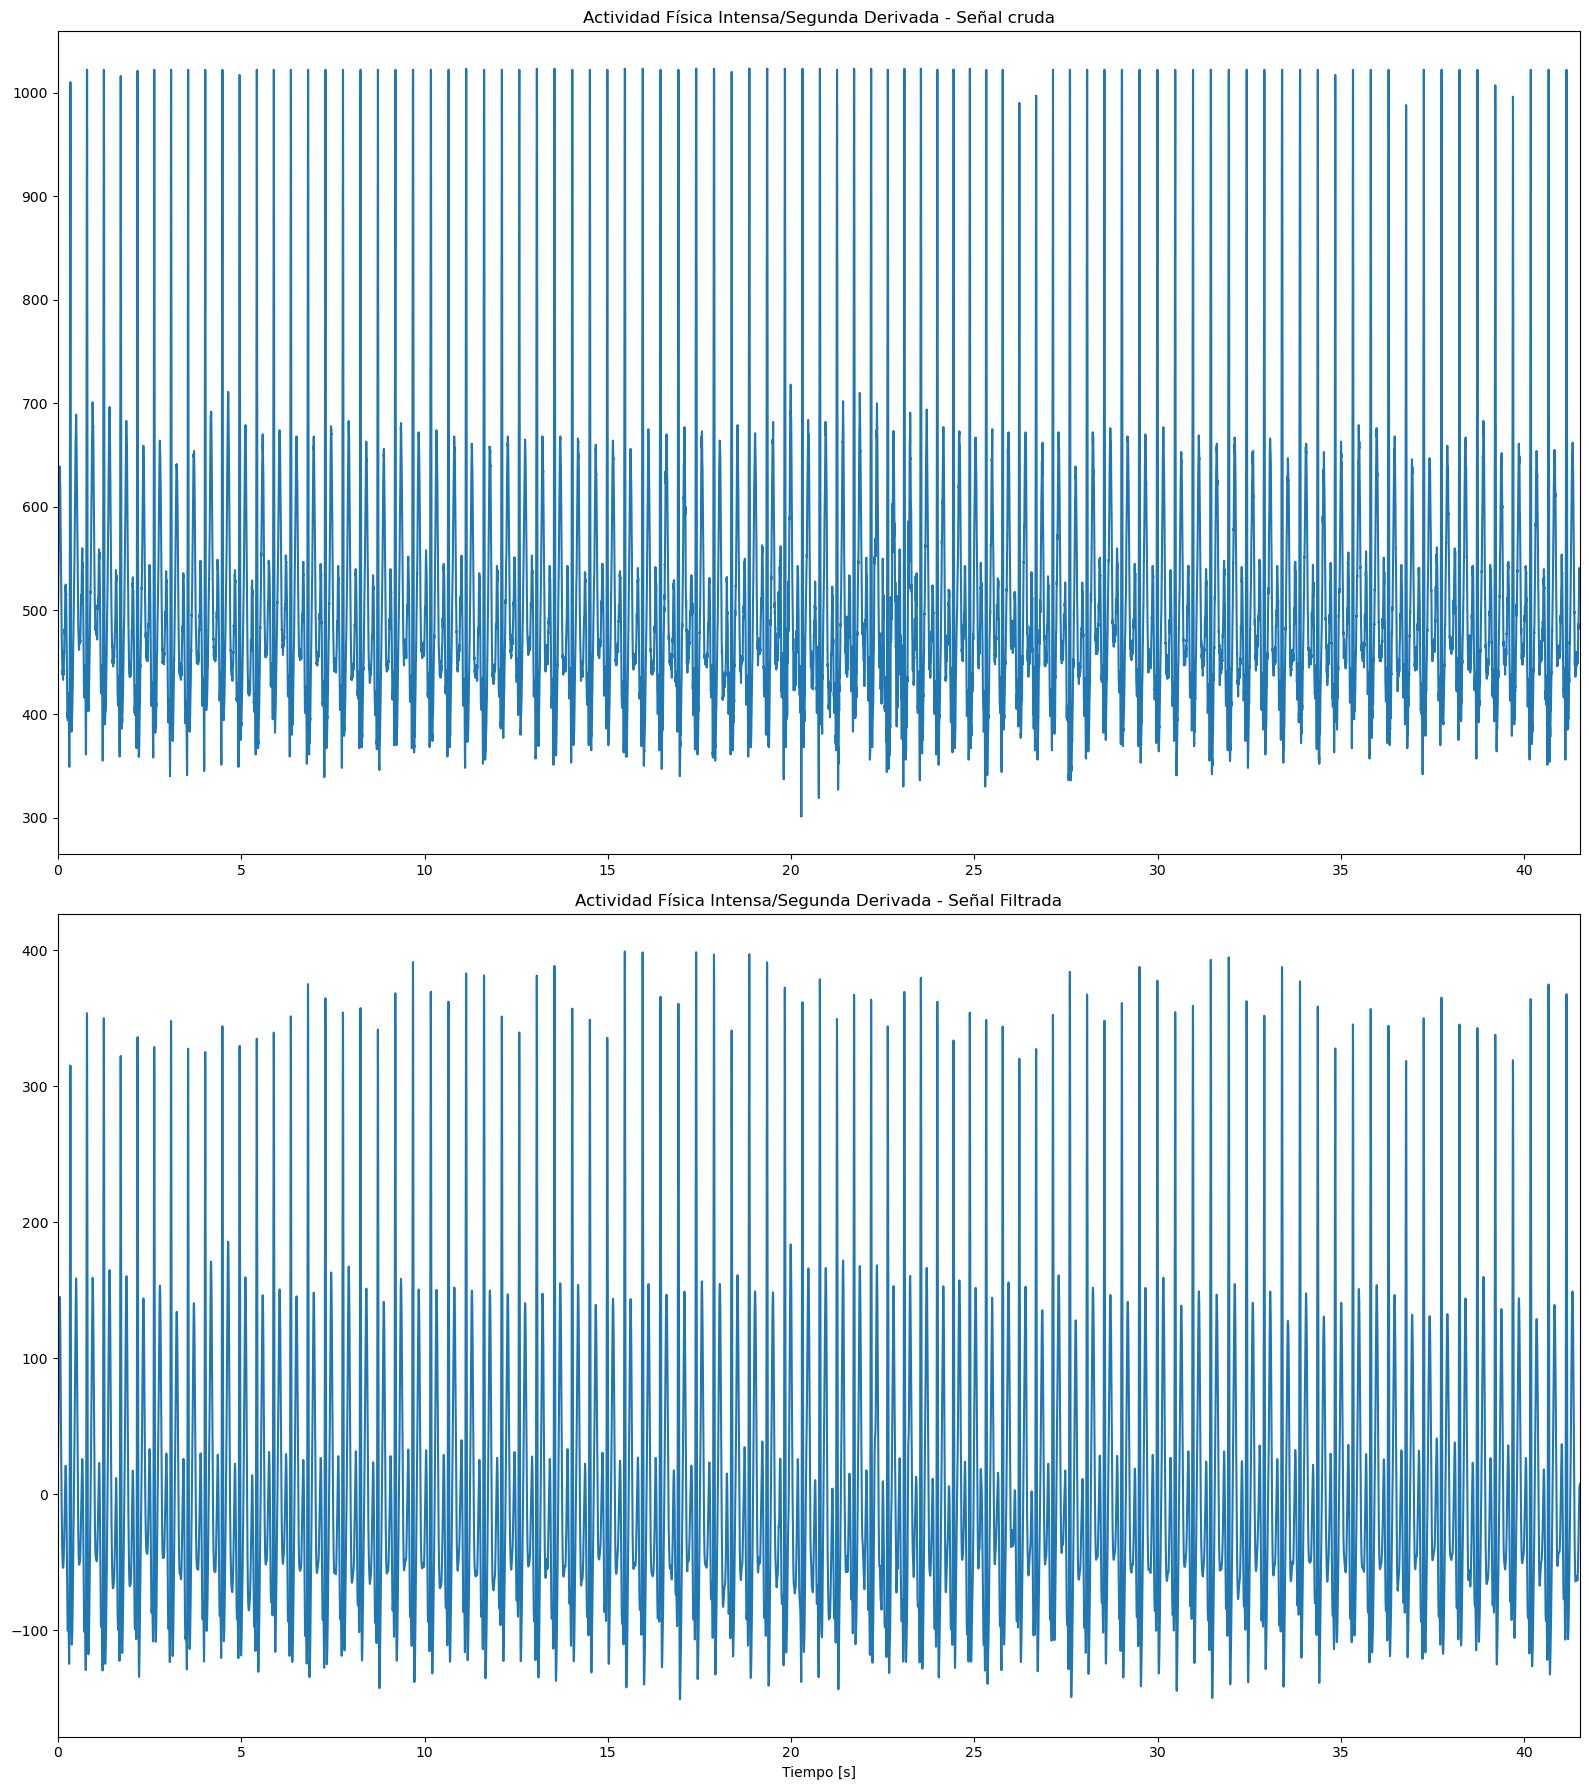

In [13]:
Fs=1000;
t2,ecgSignalD2=read("ejercicio/derivada2.txt",Fs)
clenSignalD2=nk.ecg_clean(ecgSignalD2,Fs)

plt.figure(figsize=(16,18))

plt.subplot(211)
plt.plot(t2,ecgSignalD2)
plt.title('Actividad Física Intensa/Segunda Derivada - Señal cruda') 
plt.autoscale(True, axis='x', tight=True)

plt.subplot(212)
plt.plot(t2,clenSignalD2)
plt.xlabel('Tiempo [s]')
plt.title('Actividad Física Intensa/Segunda Derivada - Señal Filtrada') 
plt.autoscale(True, axis='x', tight=True)

plt.tight_layout()
plt.show()

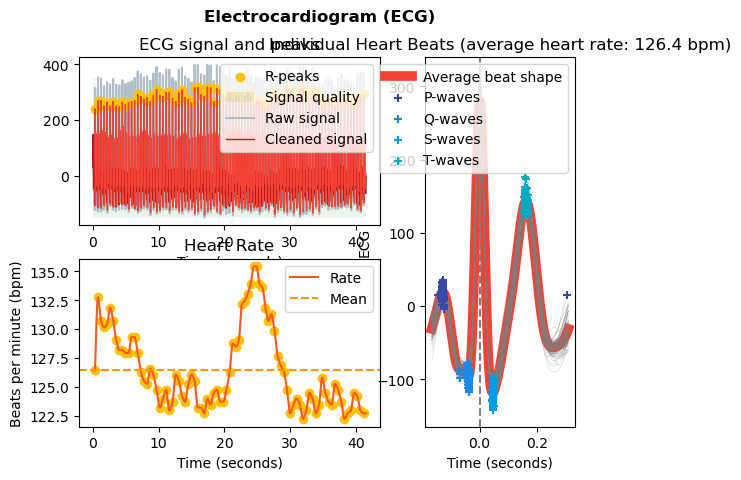

In [15]:
signalD2, infoD2 = nk.ecg_process(clenSignalD2, Fs)
nk.ecg_plot(signalD2,infoD2)

In [16]:
ecg_analisisD2 = nk.ecg_analyze(signalD2, Fs)
print(ecg_analisisD2)

  ECG_Rate_Mean             HRV_MeanNN                HRV_SDNN HRV_SDANN1  \
0    126.420426  [[474.6046511627907]]  [[12.949929883768792]]    [[nan]]   

  HRV_SDNNI1 HRV_SDANN2 HRV_SDNNI2 HRV_SDANN5 HRV_SDNNI5  \
0    [[nan]]    [[nan]]    [[nan]]    [[nan]]    [[nan]]   

               HRV_RMSSD  ...              HRV_SampEn             HRV_ShanEn  \
0  [[4.483958335326186]]  ...  [[1.1411719030869056]]  [[4.943438667810566]]   

              HRV_FuzzyEn               HRV_MSEn               HRV_CMSEn  \
0  [[0.7562283746967593]]  [[0.749532293143783]]  [[0.8809783971404622]]   

               HRV_RCMSEn                  HRV_CD                HRV_HFD  \
0  [[0.8539060966908456]]  [[1.6804413616461877]]  [[1.450164354785806]]   

                  HRV_KFD                 HRV_LZC  
0  [[1.8926554737845873]]  [[0.5230680614292406]]  

[1 rows x 83 columns]


c:\Users\51913\anaconda3\envs\Diegos_environment\Lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:529: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(


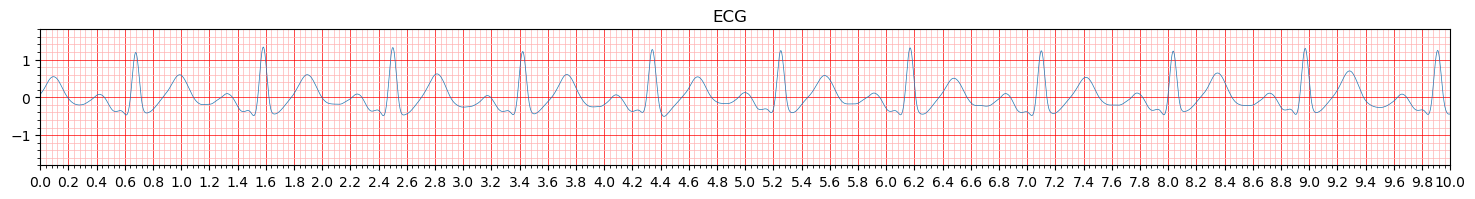

In [17]:
normalizeCleanSignal=np.array(clenSignalD2)/max(clenSignalD2)*1.5
ecg_plot.plot_1(normalizeCleanSignal[0:5000])




#### DIII



## **Discusión**

### Derivada 1
<div align="left">
  <img src="imagenes/derivada1/derivada1_basal.png" width="32%" style="display: inline-block;">
  <img src="imagenes/derivada1/derivada1_respiracion.png" width="32%" style="display: inline-block;">
  <img src="imagenes/derivada1/derivada1_ejercicio.png" width="32%" style="display: inline-block;">

  <p style="text-align: center;"><strong>Figura X: Comparación de características entre primeras derivadas (de izquierda a derecha: Basal, Aguantando respiración y Post-ejercicio)</strong></p>
</div>
<br>

Procederemos a discutir los resultados para la primera derivada del estado basal, aguantar la respiración y post-ejercicio, enfocandonos en tres aspectos particulares: bpm, las gráficas de HRV y finalmente la gráfica que nos muestra la forma promedio del latido. Vemos que para el estado basal y de aguantar la respiración, se obtuvieron valores de bpm prácticamente iguales, lo cuales de igual manera se encuentran dentro del rango esperado para un estado en reposo [A1]. Respecto al bpm obtenido post-ejercicio, el valor elevado que se obtuvo también era esperado debido a la mayor activación muscular y demanda energética que implica la actividad física.

Por el lado del HRV del estado basal y deaguantar la respiración, si bien en los primeros segundos parece haber una variación similar, al menos desde el aspecto visual de la gráfica, vemos que aumenta la frecuencia de oscilación de la derivada de aguantar la respiración durante los últimos segundos. De igual manera, a diferencia de la gráfica de HRV para basal, la de aguantar respiración parece mostrar una tendencia positiva. Esto esta relacionado a la respuesta del sistema nervioso al estado inducido de apnea. En condiciones de falta de oxígeno, se ha visto que el corazón tiende a aumentar la frecuencia cardíaca [A2], lo que implica un esfuerzo adicional que el cuerpo realiza para manejar la acumulación de dióxido de carbono y la necesidad de oxígeno a nivel del músculo cardíaco. Este esfuerzo adicional es a lo que puede deberse la oscilación que se da a gran medida en los momentos finales del HRV de aguantar la respiración. De igual manera, si bien el aumento esperado de la frecuencia cardíaca no se ve reflejado en el bpm promedio como tal, si se puede apreciar en la grafica del HRV tiende con el paso del tiempo a valores más altos que el HRV del estado basal. Este hecho, sumado a que para el HRV de aguantar la respiración tenemos que la gráfica comienza en valores mucho menores al del estado basal, explican porque el bpm promedio es igual. En el caso del HRV del estado post-ejercico, si bien vemos valores mucho más elevados, también se aprecia un descenso pronunciado en los látidos por minuto. Esto esta relacionado con los hallazgos de estudios realizados acerca de la frecuencia cardíaca tras la actividad física, donde se reporto que tras el ejercicio la frecuencia cardíaca disminuye hasta un 38% del valor máximo de bpm durante el primer minuto [A3]. De igual manera, la oscilación del HRV para el estado post-ejercicio parece seguir un patrón ordenado en nuestros resultados durante su disminución. Esto esta relacionado al hecho de que, a medida que se da la etapa de recuperación tras el ejercicio, existe una reactivación del sistema parasimpático al igual que una retirada del simpático, ambos ocurriendo de manera lenta y progresiva [A4], reflejando estos ajustes automáticos lentos en el HRV como este patrón oscilatorio ordenado.

Finalmente, respecto a la forma promedio del latido, vemos que en realidad las formas para el estado basal y de aguantar la respiración son muy similares si no identicas. De igual manera, la distribución de los puntos que representan las ondas P, Q, S y T presentan alta precisión: todos los puntos se encuentran alrededor de un mismo sitio. Esto se debe a que en estos dos estados el ECG que se visualiza en la primera derivada sigue un patrón relativamente ordenado y notoriamente periódico, por lo que da pie a que no existan muchos valores ext0.remos/outsiders. De igual manera, la duración temporal de la forma promedio para estos dos estados es similar, correspondiendo a la esperada en estados donde no se da actividad física: ∼0.8 s [A5]. Para la forma promedio post-ejercicio, destacan dos características en particular: la elevada onda T y la corta duración temporal de la forma promedio del latido. Respecto a la duración, esto es de esperarse. El venir de un estado de actividad física continua implica una mayor frecuencia cardíaca, implicando así más bpm. Esto significa que tenemos más ciclos cardiacos en la misma ventana de tiempo (1 minuto), por lo que la duración de los ciclos se reduce para que se den más en esta ventana. Esta reducción se da debido a que se acortan partes de la señal de ECG, como lo son los intervalos R-R [A6]. Por otro lado, justo después de la actividad física la amplitud de la onda T incrementa [A7], lo cual va de la mano con la forma de las ondas T que obtuvimos para el estado post-ejercicio.


## Bibliografía 

[A1] https://www.sciencedirect.com/science/article/abs/pii/S1050173822000731
[A2] https://www.iomcworld.com/open-access/cardiovascular-response-to-breathholding-explained-by-changes-of-theindices-and-their-dynamic-interactions-2329-6577-1000152.pdf
[A3] https://www.scielo.br/j/bjmbr/a/7mmq5FLwxcxKSJJx6Ns55cx/?lang=en&format=html&stop=next
[A4] https://www.frontiersin.org/journals/physiology/articles/10.3389/fphys.2017.00301/full
[A5] https://pmc.ncbi.nlm.nih.gov/articles/PMC3577223/
[A6] https://www.spandidos-publications.com/10.3892/etm.2016.3104#:~:text=Of%20note%2C%20during%20the%20onset,and%20after%20training%20(21).
[A7] https://academic.oup.com/cardiovascres/article-abstract/6/2/143/468742?redirectedFrom=fulltext

## Anexos  

### Función para leer datos Bitalino (Basal 1 y Basal 2)

In [5]:
# Función para leer el archivo de texto y extraer la señal de ECG
import pandas as pd
import numpy as np
def funcion_leer(nombre):
    # Leer el archivo
    with open(nombre, 'r') as file:
        # Saltar las líneas de encabezado hasta que termine el EndOfHeader
        while True:
            line = file.readline()
            if "EndOfHeader" in line:
                break
        
        # Cargar los datos en un DataFrame
        data = pd.read_csv(file, delimiter='\t', header=None)
        
    # Seleccionar solo la quinta columna (índice 4 ya que Python empieza desde 0)
    columna_5 = data.iloc[:, 5]
    # Convertir la columna a un array de NumPy
    array_np = np.array(columna_5)
    return array_np

### Función para leer datos Bitalino y convertir a mV (Basal 3)

In [3]:
import numpy as np
def convertir_a_mV(dato,N_bits=10,valor_minimo=-1.64,valor_máximo=1.64):
    llaves = list(range(0,2**N_bits))
    valores = np.linspace(valor_minimo, valor_máximo, len(llaves))
    dic_valores = dict(zip(llaves,valores))
    
    #para crear una lista directamente, con elementos 0
    data_convertido = np.zeros(len(dato))
    indice = 0
    for valor in dato:
        data_convertido[indice] = dic_valores.get(int(valor), 0)
        indice += 1
    return data_convertido


#Función para obtener datos del TXT
def obtener_dato_de_txt(archivo):
    datos = []
    marcador = False
    #empezar la lactura de los txt
    for linea in archivo: #por cada línea
        if marcador: #recién adjuntará datos al ser verdadero
            datos.append(linea.rstrip().split("\t")[5])
        elif linea.rstrip() == "# EndOfHeader":  #marcador será verdadero a partir la línea esa
            marcador = True
    return datos

### Función para plotear ECG y analizarla (Basal 1 y Basal 2)


In [1]:
import neurokit2 as nk
import matplotlib.pyplot as plt
import ecg_plot


def procesar_ecg(signal_raw, nombre,sampling_rate=1000,max_voltage=1.5,rango1=0,rango2=5000):
    # Escalar la señal cruda al rango de 0 a 1.2 V
    signal_scaled = (signal_raw / max(signal_raw)) * 1.2
    plt.figure(figsize=(8,4))

    plt.plot((np.arange(len(signal_scaled))/1000)[rango1:rango2],signal_scaled[rango1:rango2],"b")
    plt.title(f"Señal cruda {nombre}")
    plt.xlabel("Tiempo")
    plt.ylabel("mVoltios")
    plt.grid()
    plt.show()

    # Limpiar la señal
    signal_cleaned = nk.ecg_clean(signal_scaled, sampling_rate=sampling_rate)

    # Verificar si la señal limpiada tiene longitud válida
    if len(signal_cleaned) > 0:
        # Procesar la señal
        signals, info = nk.ecg_process(signal_cleaned, sampling_rate=sampling_rate)
        
        # Analizar la señal
        report = nk.ecg_analyze(signals, sampling_rate=sampling_rate)

        # Escalar la señal limpiada a un nuevo voltaje máximo (1.5 V en este caso)
        signal_cleaned_scaled = (signal_cleaned / max(signal_cleaned)) * max_voltage
        plt.figure(figsize=(8,4))

        plt.plot((np.arange(len(signal_cleaned_scaled))/1000)[rango1:rango2],signal_cleaned_scaled[rango1:rango2],"b")
        plt.title(f"Señal limpiada {nombre}")
        plt.xlabel("Tiempo")
        plt.ylabel("mVoltios")
        plt.grid()
        plt.show()

        # Graficar la señal escalada y limpiada
        ecg_plot.plot_1(signal_cleaned_scaled[0:5000])
        nk.ecg_plot(signals, info)

        return report, signals, info
    else:
        print("Error: La señal limpiada está vacía. Revisa la señal original y el proceso de limpieza.")
        return None, None, None

### Funciones usadas para Respiracion1 y Respiracion2

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import neurokit2 as nk
import ecg_plot

def extraer_datos(data):
    # Abrir el archivo de texto
    with open(data, "r") as f:
        # Saltar las tres primeras líneas
        next(f)
        next(f)
        next(f)
        
        # Leer todas las líneas restantes
        all_data = f.readlines()   
    
    # Procesar cada línea, dividiendo por tabulaciones
    all_data = [line.strip().split('\t') for line in all_data]
    
    # Extraer la primera columna (muestra)
    sample = [int(row[0]) for row in all_data]  # Primera columna

    # Crear una secuencia de números para la muestra (opcional, según tu lógica)
    sample = np.arange(0, len(sample))  # Reemplaza los valores por una secuencia 0, 1, 2, ..., n
    
    # Extraer la sexta columna (amplitud)
    amplitude = [int(row[5]) for row in all_data]  # Sexta columna (índice 5)
    amplitude = np.array(amplitude)
    return sample, amplitude  # Devolver los valores de la muestra y amplitud


def grafica(sample, amplitude):
    plt.figure(figsize=(12, 5))

    plt.plot(sample/1000, amplitude)
    plt.title('Señal de ECG cruda: Aguantar respiración')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud')
    plt.grid(True)
   
    plt.tight_layout()
    plt.show()


def ecg_procesamiento(sample, raw_signal, i=1):
    cleaned_signal = nk.ecg_clean(raw_signal, sampling_rate=1000)
    #Segundo escalamiento
    cleaned_signal = cleaned_signal*1.5/np.max(cleaned_signal)
    #Ploteo de señal filtrada
    grafica(sample[0:5500], cleaned_signal[0:5500])
    
    signals, info = nk.ecg_process(cleaned_signal, sampling_rate=1000)
    nk.ecg_plot(signals, info)

    # Realizar el análisis de la señal limpia
    results = nk.ecg_analyze(signals, sampling_rate=1000)
    x = results.iloc[0, 0]
    print("Para la derivada", i, "del estado basal, el ritmo cardiaco promedio es de:", round(x), "bpm")
    ecg_plot.plot_1(cleaned_signal[0:5000])

    i += 1 #Numerador de derivadas

    return i    

### Función para plotear ECG y analizarla (Ejercicio 1 y ejercicio 2)


In [5]:
def read(archivo,Fs):
    with open(archivo,"r") as senhal:
        next(senhal)
        next(senhal)
        next(senhal)
        senhal=senhal.readlines()
        amplitude=[]
        for linea in senhal:
            x=int(linea.split()[5])
            amplitude.append(x)
        
        n=[i for i in range (len(amplitude))]
        n=np.array(n)
        t=n/Fs
    return t,amplitude

def EmgToVoltage(emg_signal, adc_resolution=10, v_ref=3.3, gain=1000, offset=1.65):
    
    # Número máximo que puede representar el ADC
    max_adc_value = 2**adc_resolution - 1
    
    # Conversión de la señal a voltios
    voltage_signal = (np.array(emg_signal) / max_adc_value) * v_ref
    
    # Restar el offset (centrar la señal en 0)
    adjusted_voltage_signal = voltage_signal - offset
    
    # Ajustar la ganancia del sensor EMG
    emg_voltage = adjusted_voltage_signal / gain
    
    return emg_voltage